In [2]:
import numpy as np
import torch

rng = np.random.default_rng(33)

N_of_samples = 30

# generating a dataset

# w: dimensionality (3)
# b: of dimensionality (1)
# eps: dimensionality (30) i.i.d. N(0,1)

w = torch.from_numpy(2 * rng.random(size=3) - 1)
b = torch.from_numpy(2 * rng.random(size=1) - 1)
eps = torch.from_numpy(rng.normal(size=N_of_samples))

print(w,b,w.unsqueeze(1))

x = torch.from_numpy(10 * rng.random(size=(N_of_samples,3)) - 5)
y = (torch.matmul(x, w.unsqueeze(1)) + b)+ eps.unsqueeze(1)

x = x.to(torch.float32)
y = y.to(torch.float32)

print(y.shape)
print(y)


tensor([-0.1127,  0.1370,  0.8162], dtype=torch.float64) tensor([-0.4915], dtype=torch.float64) tensor([[-0.1127],
        [ 0.1370],
        [ 0.8162]], dtype=torch.float64)
torch.Size([30, 1])
tensor([[-0.1279],
        [ 0.6051],
        [-2.9538],
        [ 0.7475],
        [-1.9309],
        [-3.0192],
        [-4.4777],
        [ 0.5463],
        [ 2.8312],
        [ 2.2648],
        [-1.4360],
        [ 1.2520],
        [-5.2788],
        [ 0.2087],
        [-2.8582],
        [-3.2171],
        [-3.2912],
        [ 0.7354],
        [-0.6525],
        [-2.0119],
        [-3.8644],
        [-1.5560],
        [ 1.3118],
        [-4.1333],
        [ 1.2994],
        [-0.5697],
        [-2.2705],
        [-3.8881],
        [ 2.7365],
        [ 2.0896]])


In [3]:
import torch.optim as optim
import torch.nn as nn

linear_model = nn.Linear(3,1)

def training_loop(x, y, num_of_epochs, learning_rate):
    optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)
    loss_fn = nn.MSELoss()
    for epoch in range(num_of_epochs):
        y_pred = linear_model(x)
        if epoch == 0:
            print(f'shape of y_pred:{y_pred.shape}')
        loss = loss_fn(y, y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch < 3 or (epoch+1) % 500 == 0:
            print(f'epoch:{epoch + 1} loss:{loss}')

# do training
training_loop(x,y,5000,1e-3)


shape of y_pred:torch.Size([30, 1])
epoch:1 loss:13.706069946289062
epoch:2 loss:13.251578330993652
epoch:3 loss:12.813220024108887
epoch:500 loss:0.8029464483261108
epoch:1000 loss:0.8028889298439026
epoch:1500 loss:0.8028796315193176
epoch:2000 loss:0.802878201007843
epoch:2500 loss:0.8028777241706848
epoch:3000 loss:0.8028777837753296
epoch:3500 loss:0.8028777837753296
epoch:4000 loss:0.8028777837753296
epoch:4500 loss:0.8028777241706848
epoch:5000 loss:0.8028777241706848


In [4]:
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[-0.0457,  0.1672,  0.7139]], requires_grad=True), Parameter containing:
tensor([-0.6153], requires_grad=True)]


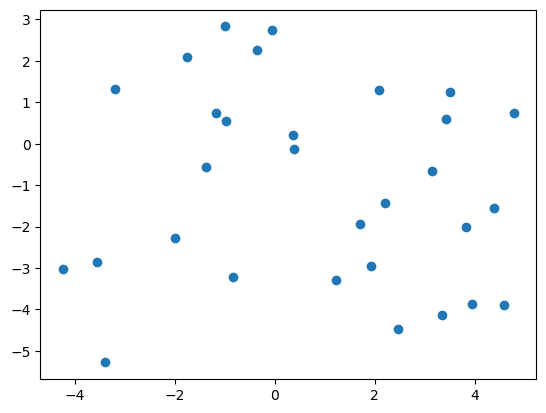

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.plot(x[:,0],y, 'o')
plt.show(fig)